In [109]:
# from google.colab import drive
# drive.mount('/content/drive')

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

In [111]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/dataset/mnist/Diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
diabetes_df.shape

(768, 9)

In [113]:
print("Column Names:")
print(dataset.columns[8])

Column Names:
Outcome


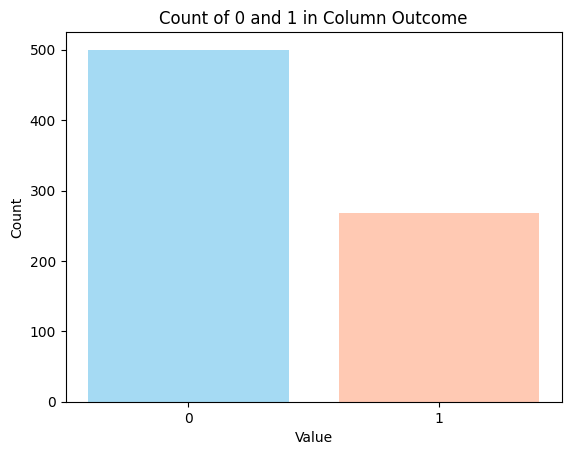

In [114]:
# Count the occurrences of 0 and 1 in the selected column
counts = dataset[dataset.columns[8]].value_counts()

# Plot the bar chart
plt.bar(counts.index, counts.values, color=['#A5DAF3', '#FFC9B3'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of 0 and 1 in Column ' + dataset.columns[8])
plt.xticks(counts.index, ['0', '1'])  # Set x-axis ticks to ['0', '1']
plt.show()


In [115]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [116]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [117]:
shuffled_df = diabetes_df.sample(frac=1.0, random_state=42)
shuffled_df.reset_index(drop=True, inplace=True)

In [118]:
X = shuffled_df.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.148,21
2,2,108,64,0,0,30.8,0.158,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26
764,1,96,122,0,0,22.4,0.207,27
765,10,101,86,37,0,45.6,1.136,38
766,0,141,0,0,0,42.4,0.205,29


In [119]:
np.random.seed(42)

train_ratio = 0.75  # 75% train, 25% test

train_size = int(train_ratio * len(diabetes_df))
test_size = len(diabetes_df) - train_size

train_data = diabetes_df.iloc[:train_size]
test_data = diabetes_df.iloc[train_size:]

X_train = train_data.drop(columns=['Outcome'])
y_train = train_data['Outcome']
X_test = test_data.drop(columns=['Outcome'])
y_test = test_data['Outcome']

print("Number of training set:", len(train_data))
print("Number of testing set:", len(test_data))

Number of training set: 576
Number of testing set: 192


In [120]:
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.fit_transform(test_data)
print(X_train_scaled)

[[ 0.65588817  0.85819334  0.16567205 ...  0.438215    1.42904929
   1.38169856]
 [-0.83972381 -1.07585957 -0.14567249 ... -0.38420635 -0.18576903
  -0.72374686]
 [ 1.25413296  1.93266718 -0.249454   ...  0.57230543 -0.10077859
   1.38169856]
 ...
 [-0.54060141 -0.67676929 -0.45701703 ... -0.84011383 -0.95068297
  -0.72374686]
 [-0.83972381  0.70469708  0.89214264 ...  1.22785868 -0.86569253
  -0.72374686]
 [-0.83972381 -0.03208498 -1.28726914 ... -0.59577126 -0.69571166
  -0.72374686]]


In [126]:
class LogisticRegression:

    def __init__(self, learning_rate=0.00001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, X, y):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def _initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._initialize_parameters(n_features)

        # Gradient descent optimization
        for _ in range(self.num_iterations):
            # Compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        return np.round(y_pred)


In [127]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = model.predict(X_test_scaled)

# Define functions for precision and recall
def precision_score(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))

    if true_positives + false_positives == 0:
        return 0
    else:
        return true_positives / (true_positives + false_positives)

def recall_score(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    if true_positives + false_negatives == 0:
        return 0
    else:
        return true_positives / (true_positives + false_negatives)

def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

# Compute precision and recall manually
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

loss = model.log_loss(X_test_scaled, y_test)

# Print precision and recall
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("Loss:", loss)

Precision: 0.9444444444444444
Recall: 0.9714285714285714
Accuracy: 0.96875
Loss: 0.6895478248767596


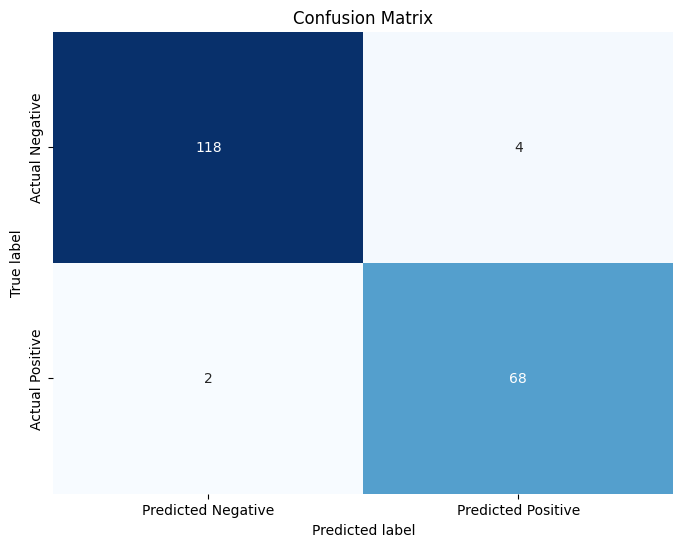

In [123]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


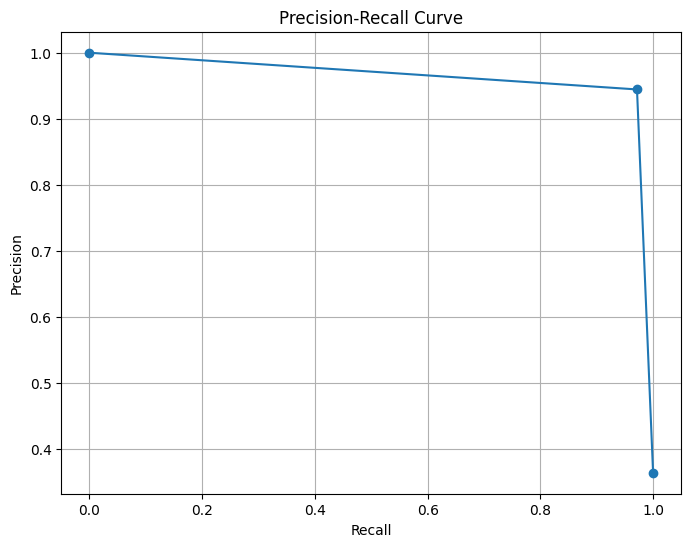

In [125]:
# Calculate precision and recall scores
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()